In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, r2_score

In [2]:
train_path = "data/train.csv"
test_path = "data/test.csv"
submission_path = "submission/2-RF-100-30.csv"
rs = 42

In [3]:
train_df = pd.read_csv(train_path)
print(train_df.shape)
train_df.head()

(8500, 6)


,ID,AT,V,AP,RH,EP
0,1,28.62,69.71,1009.67,62.12,437.52
1,2,14.84,41.48,1017.26,63.42,460.30
2,3,26.04,74.67,1016.68,81.20,433.55
3,4,13.55,42.99,1007.58,97.55,470.82
4,5,20.10,59.87,1018.97,87.23,444.71


In [4]:
test_df = pd.read_csv(test_path)
print(test_df.shape)
test_df.head()

(1068, 5)


,ID,AT,V,AP,RH
0,8501,8.91,40.69,1015.11,89.65
1,8502,25.63,48.92,1009.99,34.64
2,8503,18.98,60.10,1010.09,85.34
3,8504,8.02,39.04,1018.49,68.07
4,8505,34.10,73.03,1014.01,41.26


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8500 entries, 0 to 8499
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      8500 non-null   int64  
 1   AT      8500 non-null   float64
 2   V       8500 non-null   float64
 3   AP      8500 non-null   float64
 4   RH      8500 non-null   float64
 5   EP      8500 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 398.6 KB


In [6]:
train_df.drop(columns=['ID']).describe().T

,count,mean,std,min,25%,50%,75%,max
AT,8500.0,19.656261,7.451720,1.81,13.5275,20.360,25.7125,35.77
V,8500.0,54.310672,12.699757,25.36,41.7400,52.080,66.5400,80.25
AP,8500.0,1013.254513,5.936605,992.89,1009.1175,1012.945,1017.2400,1033.29
RH,8500.0,73.354868,14.628062,25.56,63.3800,75.025,84.9200,100.16
EP,8500.0,454.338720,17.068370,420.26,439.7275,451.440,468.4300,495.76


In [7]:
train_df.isnull().sum()

ID    0
AT    0
V     0
AP    0
RH    0
EP    0
dtype: int64

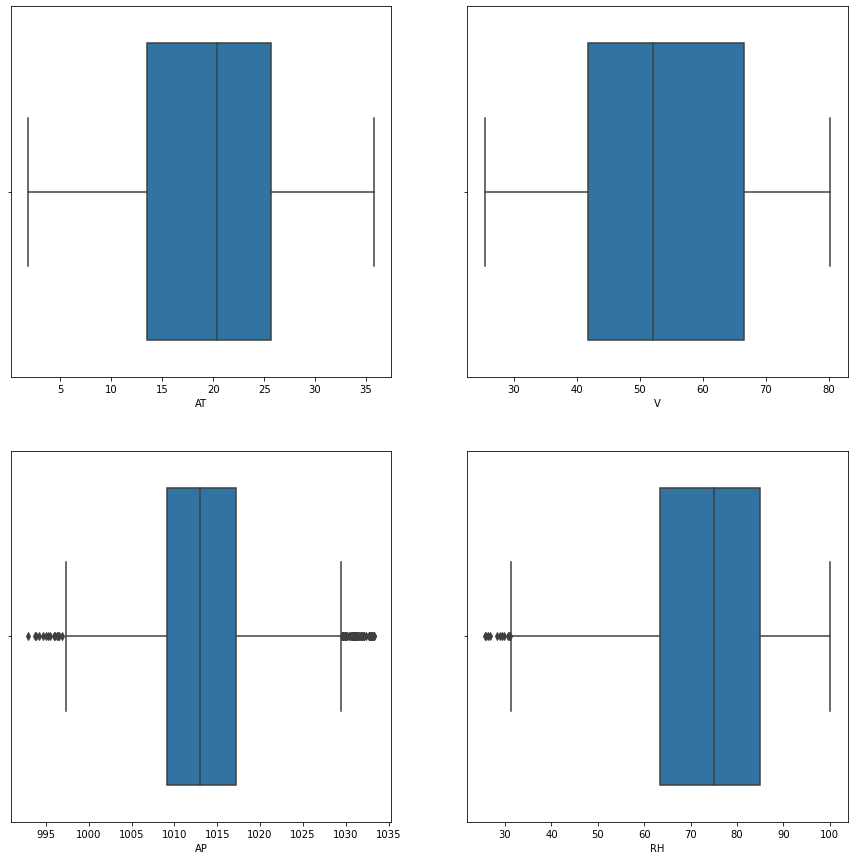

In [8]:
fig, axes = plt.subplots(2, 2)
fig.set_figwidth(15)
fig.set_figheight(15)
sns.boxplot(x='AT', data=train_df, ax=axes[0,0])
sns.boxplot(x='V', data=train_df, ax=axes[0,1])
sns.boxplot(x='AP', data=train_df, ax=axes[1,0])
sns.boxplot(x='RH', data=train_df, ax=axes[1,1])
plt.show()

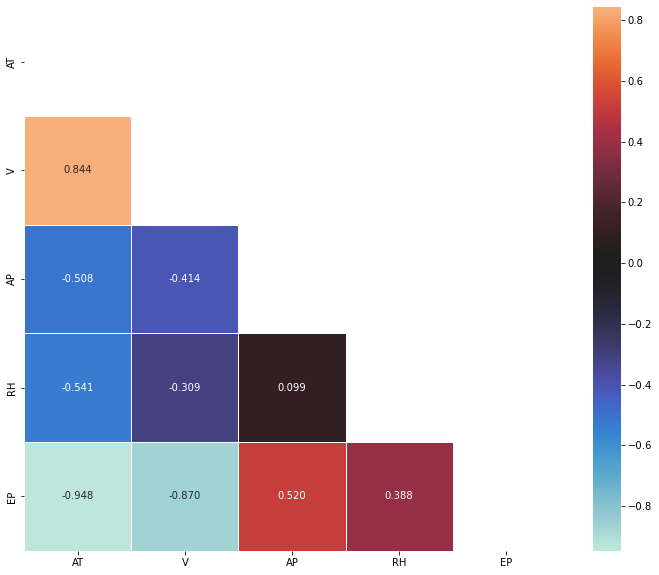

In [9]:
plt.figure(figsize=(12,10))
corr = train_df.drop(columns=['ID']).corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask,  center=0, linewidths=1, annot=True, fmt=".3f")
plt.show()

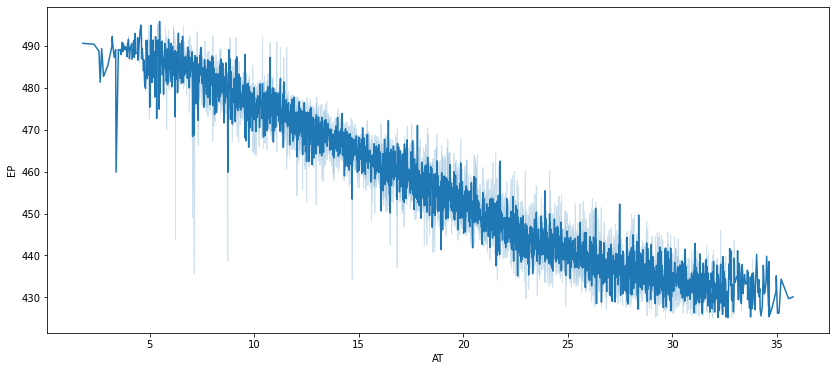

In [10]:
plt.figure(figsize=(14, 6))
sns.lineplot(data=train_df, x=train_df.AT, y=train_df.EP)
plt.show()

In [11]:
X, y = train_df.drop(columns=['ID', 'EP']), train_df.EP
train_X, val_X, train_y, val_y = train_test_split(X, y, test_size=0.2, random_state=rs)

### LinearRegression

In [12]:
pipe_lr = Pipeline([('lr', LinearRegression())])

In [13]:
pipe_lr.fit(train_X, train_y)

Pipeline(steps=[('lr', LinearRegression())])

In [14]:
predicted_train_y = pipe_lr.predict(train_X)
mean_absolute_error(train_y, predicted_train_y)

3.6195569844179967

In [15]:
r2_score(train_y, predicted_train_y)

0.9290962969612662

In [16]:
predicted_val_y = pipe_lr.predict(val_X)
mean_absolute_error(val_y, predicted_val_y)

3.5997505585367686

In [17]:
r2_score(val_y, predicted_val_y)

0.9269520225932092

### RandomForestRegressor

In [18]:
pipe_rf = Pipeline([('mm', MinMaxScaler()), ('rf', RandomForestRegressor(random_state=rs))])
pipe_rf.fit(train_X, train_y)

Pipeline(steps=[('mm', MinMaxScaler()),
                ('rf', RandomForestRegressor(random_state=42))])

In [19]:
predicted_train_y = pipe_rf.predict(train_X)
mean_absolute_error(train_y, predicted_train_y)

0.8939208382352952

In [20]:
predicted_val_y = pipe_rf.predict(val_X)
mean_absolute_error(val_y, predicted_val_y)

2.3592647058823477

In [21]:
for d in [31, 30, 60]:
    pipe_rf = Pipeline([('mm', MinMaxScaler()), ('rf', RandomForestRegressor(random_state=rs, max_depth=d, n_estimators=100))])
    pipe_rf.fit(train_X, train_y)
    predicted_val_y = pipe_rf.predict(val_X)
    print(mean_absolute_error(val_y, predicted_val_y))

2.358404455882349
2.357383966042777
2.3592647058823477


In [22]:
pipe = Pipeline([('mm', MinMaxScaler()), ('rf', RandomForestRegressor(random_state=rs, max_depth=30, n_estimators=100))])
pipe.fit(train_X, train_y)

Pipeline(steps=[('mm', MinMaxScaler()),
                ('rf', RandomForestRegressor(max_depth=30, random_state=42))])

In [23]:
test_X = test_df.drop(columns=['ID'])
predicted_test_y = pipe.predict(test_X)
predicted_test_y 

array([477.9078, 442.4564, 450.8292, ..., 456.9636, 434.1394, 480.4148])

In [24]:
submission_df = pd.DataFrame({'ID': test_df.ID, 'EP': predicted_test_y})
submission_df

,ID,EP
0,8501,477.9078
1,8502,442.4564
2,8503,450.8292
3,8504,483.8396
4,8505,435.2799
...,...,...
1063,9564,432.5219
1064,9565,437.6256
1065,9566,456.9636
1066,9567,434.1394


In [25]:
#submission_df.to_csv(submission_path, index=False)